In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## <u>Data Sourcing</u>

In [5]:
#reading the dataset
df = pd.read_csv('loan.csv', dtype ='unicode')
pd.set_option('display.max_columns', None)

In [6]:
#first five rows of loan dataframe
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

## <u>Data Cleaning</u>

<b><font color = "red">*1. Checking total number of null values in each column*</font></b>

In [7]:
#checking number of null values in each column
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
#calculating percentage of missing values in each column
round(df.isnull().sum()/len(df.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [9]:
#columns with all the null or missing values
print(df.columns[100*(df.isnull().sum()/len(df.index)) > 99])
print("total number of missing columns : ", len(df.columns[100*(df.isnull().sum()/len(df.index)) > 99]))

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

<b><font color = "red">*2. Removing Columns with all null values*</font></b>

In [10]:
#removing all the columns with all the null values
df = df.drop(df.columns[100*(df.isnull().sum()/len(df.index)) > 90], axis = 1)

In [11]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0,0,0,May-16,67.79,May-16,0,1,INDIVIDUAL,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0,13,0,7274,13.10%,40,f,0,0,2822.969293,1213.88,2500,322.97,0,0,0,Jul-10,80.9,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.4,1,Dec-86,1,5,6,0,8847,26.90%,9,f,0,0,9913.491822,1020.51,8500,1413.49,0,0,0,Jul-10,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,1e+05,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.3,0,Oct-98,0,0,11,0,9698,19.40%,20,f,0,0,5272.161128,1397.12,5000,272.16,0,0,0,Apr-08,0,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,

In [12]:
#percentage of missing values in each column
round(df.isnull().sum()/len(df.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

**The above record shows two columns having 65% and 33% null values. Both the columns are not helpful for the analysis so we can remove them.**

In [13]:
#dropping desc and mths_since_last_delinq column
df = df.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [14]:
#percentage of missing values in each column
round(df.isnull().sum()/len(df.index), 3)*100

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     6.2
emp_length                    2.7
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

**emp_length column contains small number of null values, we can replace it with mode**

In [15]:
#replacing emp_length column missing values with mode
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])

**revol_util column contains very less number of null values, hence we can drope them**

In [16]:
#dropping null values in revol_util column
df = df.dropna(subset =['revol_util'],axis=0)

<b><font color = "red">*3. Removing Columns which are not required for the analysis of loan defaulting*</font></b>

**For the analysis of loan defaulting we dont need every column in the dataset, there are lot of columns which provide information after the loan is approved and the information which is not relevant for the analysis**

**"id", "member_id", "emp_title","url","desc","title","zip_code","desc", "pub_rec_bankruptcies" columns are not useful for analysis**

**"last_credit_pull_d","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp","total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d","last_pymnt_amnt", "next_pymnt_d", "earliest_cr_line" , "chargeoff_within_12_mths" columns provide post approved loan data which is not relevant to our analysis.**

In [17]:
#removing columns which are not required for analysis
df = df.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "earliest_cr_line","chargeoff_within_12_mths","pub_rec_bankruptcies"], axis = 1)

In [18]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,delinq_amnt,tax_liens
0,5000,4975,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,1,3,0,83.70%,9,f,0,1,INDIVIDUAL,0,0,0
1,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,car,GA,1,5,3,0,9.40%,4,f,0,1,INDIVIDUAL,0,0,0
2,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,2,2,0,98.50%,10,f,0,1,INDIVIDUAL,0,0,0
3,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,other,CA,20,1,10,0,21%,37,f,0,1,INDIVIDUAL,0,0,0
4,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000,Source Verified,Dec-11,Current,n,other,OR,17.94,0,15,0,53.90%,38,f,0,1,INDIVIDUAL,0,0,0


**'pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','acc_now_delinq','application_type', 'delinq_amnt','tax_liens' - these columns contains only one type of value which again is of not useful for the analysis, so we will also remove these columns**

In [19]:
#removing columns which are not required for analysis
df = df.drop(['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','acc_now_delinq','application_type','delinq_amnt', 'tax_liens'], axis=1)

In [20]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,1,3,0,83.70%,9
1,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,car,GA,1,5,3,0,9.40%,4
2,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,2,2,0,98.50%,10
3,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,other,CA,20,1,10,0,21%,37
4,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000,Source Verified,Dec-11,Current,other,OR,17.94,0,15,0,53.90%,38


In [21]:
df.shape

(39667, 21)

<b><font color = "red">*3. Extracting year and month from issue date column for ease of analysis*</font></b>

In [22]:
#Extracting year and month from issue date column
df['issue_month'] = df['issue_d'].apply(lambda x : x.split("-")[0] )                        
df['issue_year']= '20' + df['issue_d'].apply(lambda x : x.split("-")[1] ) 

In [23]:
#dropping the issue_d column
df = df.drop(['issue_d'],axis = 1)

In [24]:
df

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,issue_month,issue_year
0,5000,4975,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000,Verified,Fully Paid,credit_card,AZ,27.65,1,3,0,83.70%,9,Dec,2011
1,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000,Source Verified,Charged Off,car,GA,1,5,3,0,9.40%,4,Dec,2011
2,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252,Not Verified,Fully Paid,small_business,IL,8.72,2,2,0,98.50%,10,Dec,2011
3,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200,Source Verified,Fully Paid,other,CA,20,1,10,0,21%,37,Dec,2011
4,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000,Source Verified,Current,other,OR,17.94,0,15,0,53.90%,38,Dec,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,1075,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000,Not Verified,Fully Paid,home_improvement,CO,11.33,0,13,0,13.10%,40,Jul,2007
39713,8500,875,36 months,10.28%,275.38,C,C1,3 years,RENT,18000,Not Verified,Fully Paid,credit_card,NC,6.4,1,6,0,26.90%,9,Jul,2007
39714,5000,1325,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,1e+05,Not Verified,Fully Paid,debt_consolidation,MA,2.3,0,11,0,19.40%,20,Jul,2007
39715,5000,650,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,2e+05,Not Verified,Fully Paid,other,MD,3.72,0,17,0,0.70%,26,Jul,2007


<b><font color = "red">*4. Standardising the column data values*</font></b>

**a) Changing the data type of columns**

In [25]:
df['loan_amnt'] = pd.to_numeric(df['loan_amnt'])
df['funded_amnt_inv'] = pd.to_numeric(df['funded_amnt_inv'])
df['installment'] = pd.to_numeric(df['installment'])
df['annual_inc'] = pd.to_numeric(df['annual_inc'])
df['dti'] = pd.to_numeric(df['dti'])
df['inq_last_6mths'] = pd.to_numeric(df['inq_last_6mths'])
df['open_acc'] = pd.to_numeric(df['open_acc'])
df['pub_rec'] = pd.to_numeric(df['pub_rec'])
df['total_acc'] = pd.to_numeric(df['total_acc'])
df['issue_year'] = pd.to_numeric(df['issue_year'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39667 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39667 non-null  int64  
 1   funded_amnt_inv      39667 non-null  float64
 2   term                 39667 non-null  object 
 3   int_rate             39667 non-null  object 
 4   installment          39667 non-null  float64
 5   grade                39667 non-null  object 
 6   sub_grade            39667 non-null  object 
 7   emp_length           39667 non-null  object 
 8   home_ownership       39667 non-null  object 
 9   annual_inc           39667 non-null  float64
 10  verification_status  39667 non-null  object 
 11  loan_status          39667 non-null  object 
 12  purpose              39667 non-null  object 
 13  addr_state           39667 non-null  object 
 14  dti                  39667 non-null  float64
 15  inq_last_6mths       39667 non-null 

**a) Removing < and + sign from the emp_length column and standardizing the data values to 10 years for 10+ years and 1 for < 1 year**

In [27]:
#extracting only numeric values from the column
df['emp_length'] = df['emp_length'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1)
#converting data values to integer
df['emp_length'] = df['emp_length'].astype('int')

**b) Converting the term column values from months to years**

In [28]:
#extracting only numeric values from the column
df['term'] = (df['term'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1))/12

#converting data values to integer
df['term'] = df['term'].astype('int')

**c) Removing % sign from int_rate and revol_util column and converting the data values to float**

In [29]:
#extracting only numeric values from the column int_rate and converting to float
df['int_rate'] = (df['int_rate'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(float))/100

In [30]:
#extracting only numeric values from the column revol_util and converting to float
df['revol_util'] = (df['revol_util'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(float))/100

In [31]:
df

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,issue_month,issue_year
0,5000,4975.0,3,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,1,3,0,83.70,9,Dec,2011
1,2500,2500.0,5,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,5,3,0,9.40,4,Dec,2011
2,2400,2400.0,3,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,2,2,0,98.50,10,Dec,2011
3,10000,10000.0,3,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,1,10,0,0.21,37,Dec,2011
4,3000,3000.0,5,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Current,other,OR,17.94,0,15,0,53.90,38,Dec,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,1075.0,3,8.07,78.42,A,A4,4,MORTGAGE,110000.0,Not Verified,Fully Paid,home_improvement,CO,11.33,0,13,0,13.10,40,Jul,2007
39713,8500,875.0,3,10.28,275.38,C,C1,3,RENT,18000.0,Not Verified,Fully Paid,credit_card,NC,6.40,1,6,0,26.90,9,Jul,2007
39714,5000,1325.0,3,8.07,156.84,A,A4,1,MORTGAGE,100000.0,Not Verified,Fully Paid,debt_consolidation,MA,2.30,0,11,0,19.40,20,Jul,2007
39715,5000,650.0,3,7.43,155.38,A,A2,1,MORTGAGE,200000.0,Not Verified,Fully Paid,other,MD,3.72,0,17,0,0.70,26,Jul,2007


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39667 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39667 non-null  int64  
 1   funded_amnt_inv      39667 non-null  float64
 2   term                 39667 non-null  int32  
 3   int_rate             39667 non-null  float64
 4   installment          39667 non-null  float64
 5   grade                39667 non-null  object 
 6   sub_grade            39667 non-null  object 
 7   emp_length           39667 non-null  int32  
 8   home_ownership       39667 non-null  object 
 9   annual_inc           39667 non-null  float64
 10  verification_status  39667 non-null  object 
 11  loan_status          39667 non-null  object 
 12  purpose              39667 non-null  object 
 13  addr_state           39667 non-null  object 
 14  dti                  39667 non-null  float64
 15  inq_last_6mths       39667 non-null 

**Now our data is ready for analysis**

## UNIVARIATE ANALYSIS

In [33]:
df

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,issue_month,issue_year
0,5000,4975.0,3,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,1,3,0,83.70,9,Dec,2011
1,2500,2500.0,5,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,5,3,0,9.40,4,Dec,2011
2,2400,2400.0,3,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,2,2,0,98.50,10,Dec,2011
3,10000,10000.0,3,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,1,10,0,0.21,37,Dec,2011
4,3000,3000.0,5,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Current,other,OR,17.94,0,15,0,53.90,38,Dec,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,1075.0,3,8.07,78.42,A,A4,4,MORTGAGE,110000.0,Not Verified,Fully Paid,home_improvement,CO,11.33,0,13,0,13.10,40,Jul,2007
39713,8500,875.0,3,10.28,275.38,C,C1,3,RENT,18000.0,Not Verified,Fully Paid,credit_card,NC,6.40,1,6,0,26.90,9,Jul,2007
39714,5000,1325.0,3,8.07,156.84,A,A4,1,MORTGAGE,100000.0,Not Verified,Fully Paid,debt_consolidation,MA,2.30,0,11,0,19.40,20,Jul,2007
39715,5000,650.0,3,7.43,155.38,A,A2,1,MORTGAGE,200000.0,Not Verified,Fully Paid,other,MD,3.72,0,17,0,0.70,26,Jul,2007


In [34]:
df['loan_status'].value_counts()

Fully Paid     32916
Charged Off     5611
Current         1140
Name: loan_status, dtype: int64

**we dont need the current loan status data so we can ignore it**

In [35]:
df = df[df['loan_status'] != 'Current']

<b><font color = "red">*Observation 1*</font></b>

<AxesSubplot:xlabel='loan_status', ylabel='count'>

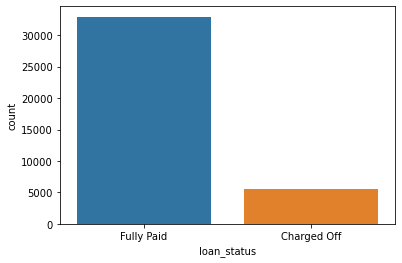

In [36]:
sns.countplot(x = 'loan_status', data = df)

In [37]:
#calculating the defaulters percentage
round(len(df[df['loan_status'] == 'Charged Off'])/len(df)*100,2)

14.56

<b><font color = "blue">*Approximately 14.5% people are defaulters*</font></b>

<b><font color = "red">*Observation 2*</font></b>

<AxesSubplot:xlabel='term', ylabel='count'>

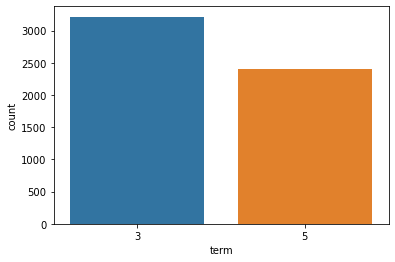

In [38]:
# plotting default rates across grade of the loan
sns.countplot(x = 'term', data = df[df['loan_status'] == 'Charged Off'])

<b><font color = "blue">*Defaulters are more in 3 year or 36 months term as compared to 5 year term*</font></b>

<b><font color = "red">*Observation 3*</font></b>

<AxesSubplot:xlabel='grade', ylabel='count'>

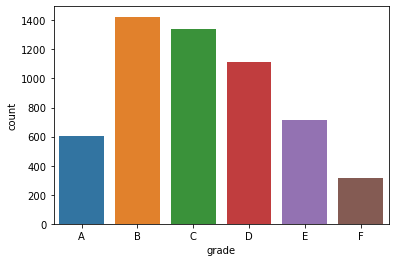

In [39]:
sns.countplot(x = 'grade', data = df[df['loan_status'] == 'Charged Off'], order = ['A','B','C','D','E','F'])

<b><font color = "blue">*Most of the defaulters are of grade B*</font></b>

<b><font color = "red">*Observation 4*</font></b>

<AxesSubplot:xlabel='grade', ylabel='count'>

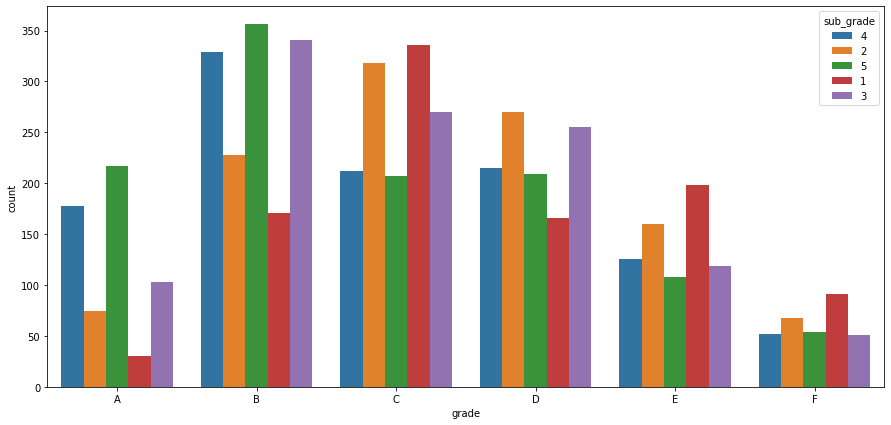

In [40]:
df['sub_grade'] = df['sub_grade'].apply(lambda x : x[1])
plt.figure(figsize=[15,7])
sns.countplot(x = 'grade', data = df[df['loan_status'] == 'Charged Off'],hue = 'sub_grade', order = ['A','B','C','D','E','F'])

<b><font color = "blue">*In Grade B, B5 are most in defaulters*</font></b>

<b><font color = "red">*Observation 5*</font></b>

<AxesSubplot:xlabel='emp_length', ylabel='count'>

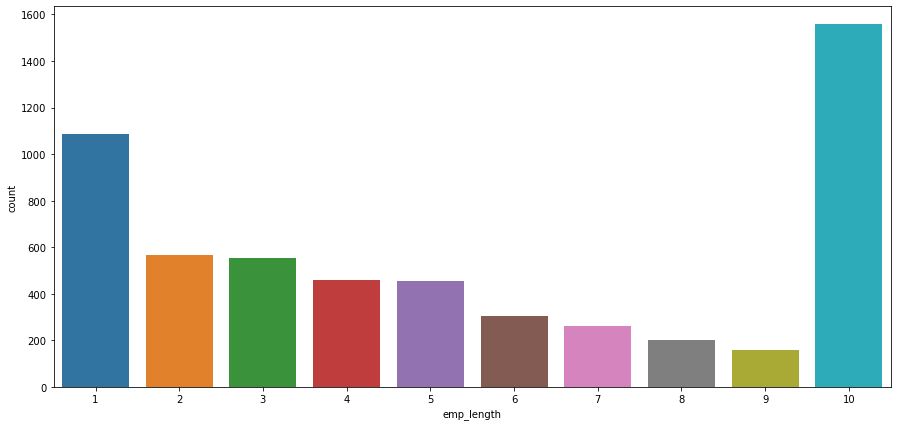

In [41]:
plt.figure(figsize=[15,7])
sns.countplot(x = 'emp_length', data = df[df['loan_status'] == 'Charged Off'])

<b><font color = "blue">*People with employment length more than 10 years are topping the defaulters list*</font></b>

<b><font color = "red">*Observation 6*</font></b>

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

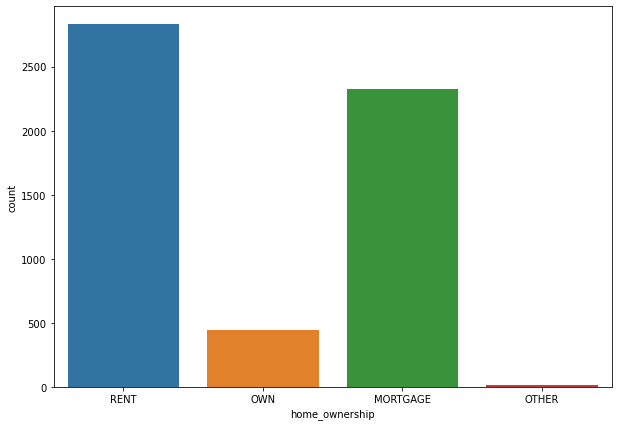

In [42]:
plt.figure(figsize=[10,7])
sns.countplot(x = 'home_ownership', data = df[df['loan_status'] == 'Charged Off'])

<b><font color = "blue">*People living in rent are mostly in defaulters*</font></b>

<b><font color = "red">*Observation 7*</font></b>

<AxesSubplot:xlabel='verification_status', ylabel='count'>

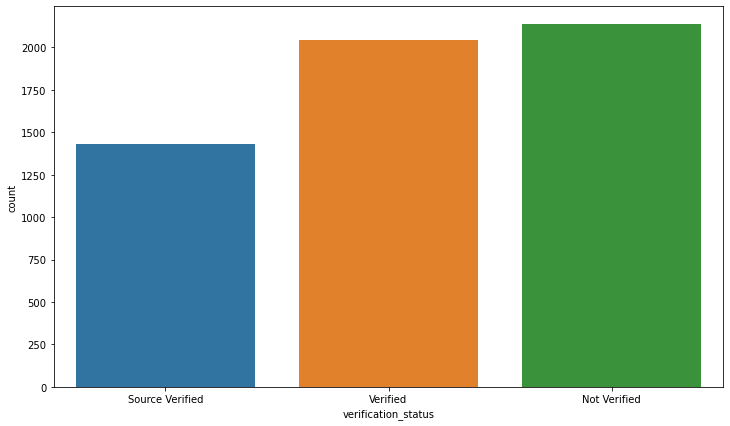

In [43]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'verification_status', data = df[df['loan_status'] == 'Charged Off'])

<b><font color = "blue">*People whose verification is incomplete are mostly defaulters*</font></b>

<b><font color = "red">*Observation 8*</font></b>

<AxesSubplot:xlabel='count', ylabel='purpose'>

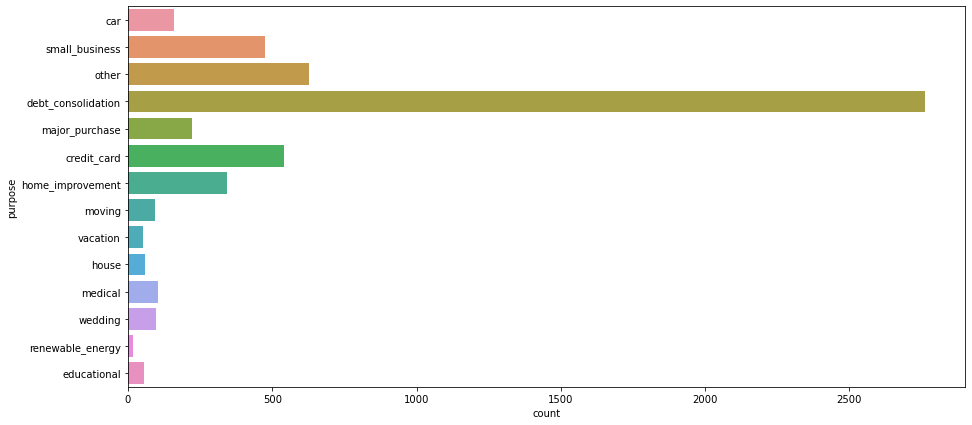

In [44]:
plt.figure(figsize=[15,7])
sns.countplot(y = 'purpose', data = df[df['loan_status'] == 'Charged Off'])

<b><font color = "blue">*Debt Consolidation loan seekers defaults the most*</font></b>

<b><font color = "red">*Observation 9*</font></b>

<AxesSubplot:xlabel='count', ylabel='addr_state'>

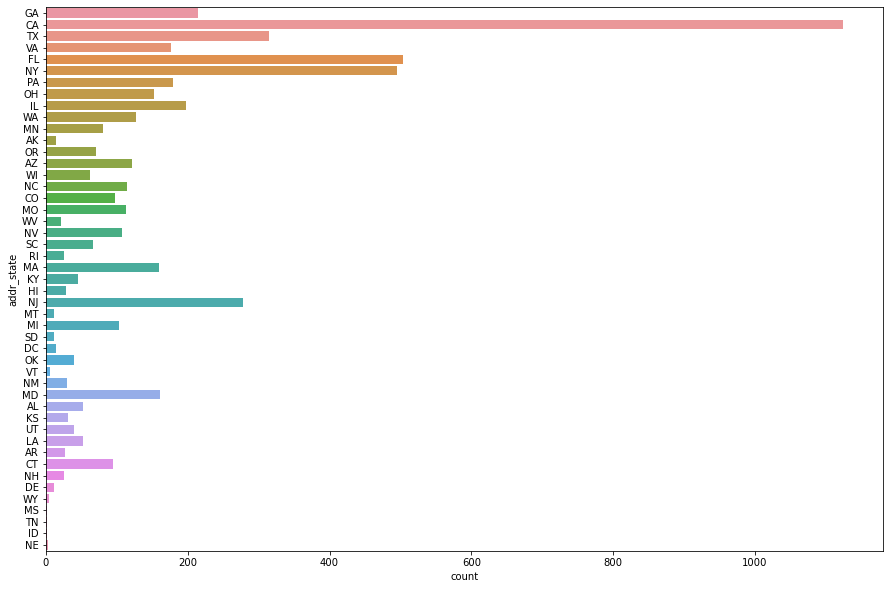

In [45]:
plt.figure(figsize=[15,10])
sns.countplot(y = 'addr_state', data = df[df['loan_status'] == 'Charged Off'])

<b><font color = "blue">*People from CA are most in defaulters*</font></b>

<b><font color = "red">*Observation 10*</font></b>

<AxesSubplot:xlabel='pub_rec', ylabel='count'>

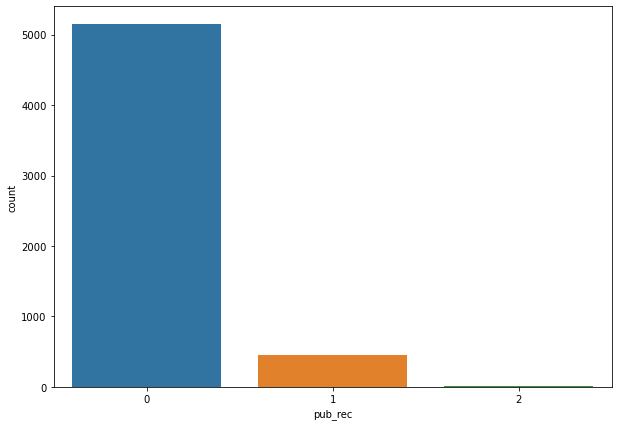

In [46]:
plt.figure(figsize=[10,7])
sns.countplot(x = 'pub_rec', data = df[df['loan_status'] == 'Charged Off'])

<b><font color = "blue">*People with no public record are most in defaulters*</font></b>

<b><font color = "red">*Observation 11*</font></b>

<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

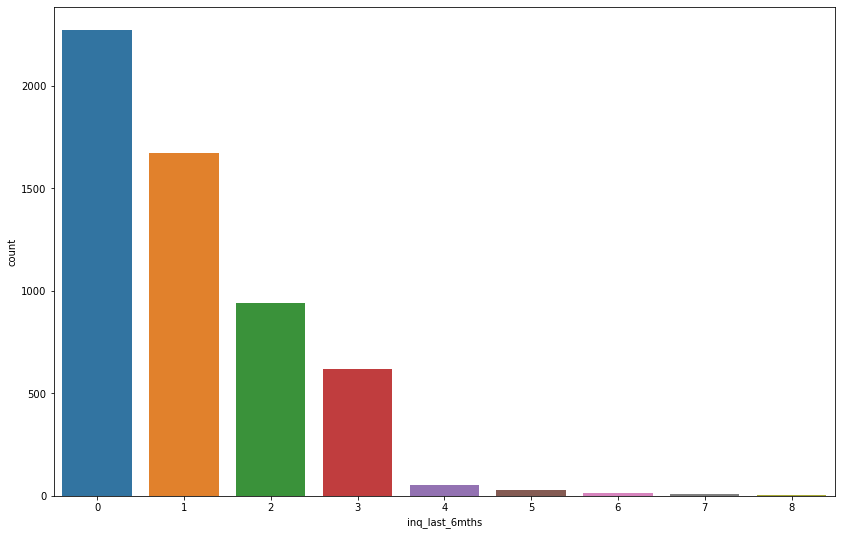

In [47]:
plt.figure(figsize=[14,9])
sns.countplot(x = 'inq_last_6mths', data = df[df['loan_status'] == 'Charged Off'])

<b><font color = "blue">*People with zero public enquiries are highest in defaulters*</font></b>

<b><font color = "red">*Observation 12*</font></b>

<AxesSubplot:xlabel='issue_year', ylabel='count'>

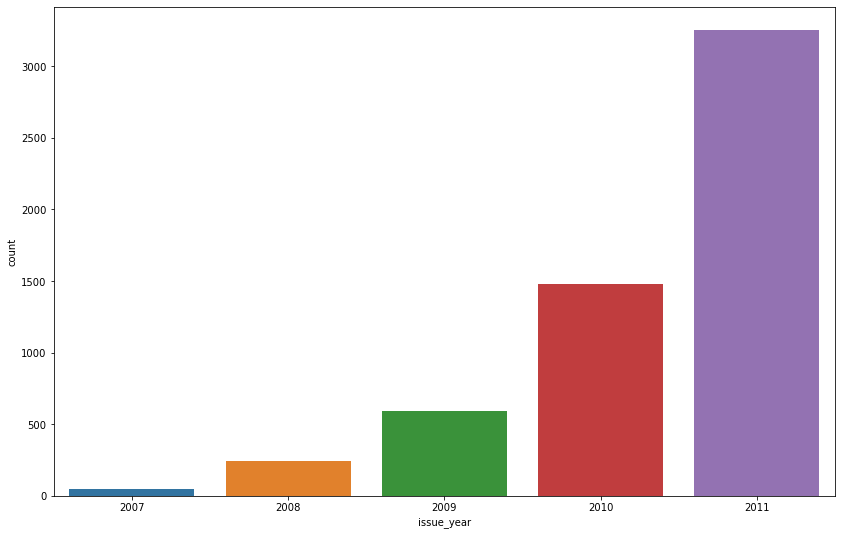

In [48]:
plt.figure(figsize=[14,9])
sns.countplot(x = 'issue_year', data = df[df['loan_status'] == 'Charged Off'])

<b><font color = "blue">*People who took loan in 2011 tops the defaulters list*</font></b>

<b><font color = "red">*Observation 13*</font></b>

<AxesSubplot:xlabel='issue_month', ylabel='count'>

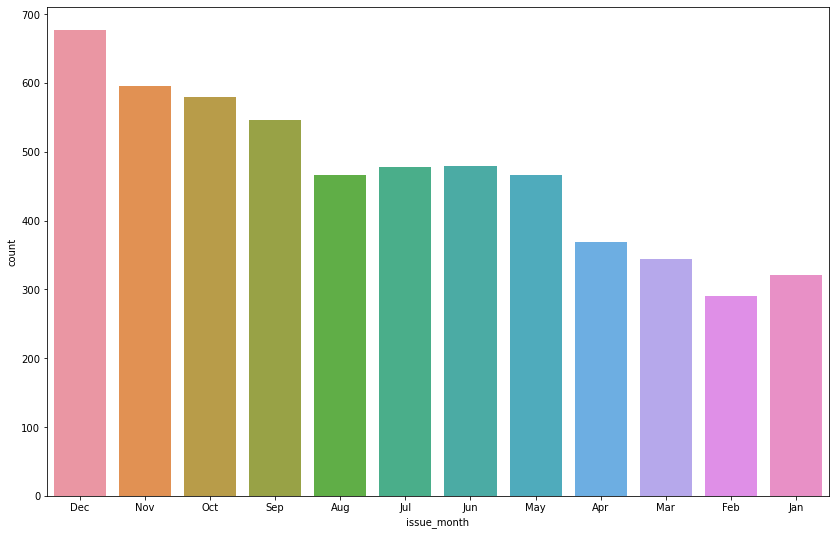

In [49]:
plt.figure(figsize=[14,9])
sns.countplot(x = 'issue_month', data = df[df['loan_status'] == 'Charged Off'])

<b><font color = "blue">*People who took loan in month of december are mostly in defaulters*</font></b>

## SEGMENTED UNIVARIATE ANALYSIS

**There are some columns with continuos values, we can put them into discrete groups for analysis**

**Binning the continuos data values in columns**

In [50]:
df['loan_amnt_cat'] = pd.cut(df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
df['funded_amnt_inv_cat'] = pd.cut(df['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
df['int_rate_cat'] = pd.cut(df['int_rate'], bins=4,precision =0,labels=['5%-10%','10%-15%','15%-20%','20%-25%'])
df['open_acc_cat'] = pd.cut(df['open_acc'],bins = 9,precision =0,labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45'])
df['revol_util_cat'] = pd.cut(df['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
df['total_acc_cat'] = pd.cut(df['total_acc'], bins=9,precision =0,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90'])
df['installment_cat'] = pd.cut(df['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
df['dti_cat'] = pd.cut(df['dti'], bins=6,precision =0,labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

In [51]:
df

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,issue_month,issue_year,loan_amnt_cat,funded_amnt_inv_cat,int_rate_cat,open_acc_cat,revol_util_cat,total_acc_cat,installment_cat,dti_cat
0,5000,4975.0,3,10.65,162.87,B,2,10,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,1,3,0,83.70,9,Dec,2011,0-5k,0-5k,10%-15%,0-5,80-100,0-10,145-274,25-30
1,2500,2500.0,5,15.27,59.83,C,4,1,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,5,3,0,9.40,4,Dec,2011,0-5k,0-5k,15%-20%,0-5,0-20,0-10,14-145,0-5
2,2400,2400.0,3,15.96,84.33,C,5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,2,2,0,98.50,10,Dec,2011,0-5k,0-5k,15%-20%,0-5,80-100,0-10,14-145,5-10
3,10000,10000.0,3,13.49,339.31,C,1,10,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,1,10,0,0.21,37,Dec,2011,5k-10k,5k-10k,10%-15%,5-10,0-20,30-40,274-403,20-25
5,5000,5000.0,3,7.90,156.46,A,4,3,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,3,9,0,28.30,12,Dec,2011,0-5k,0-5k,5%-10%,5-10,20-40,10-20,145-274,10-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,1075.0,3,8.07,78.42,A,4,4,MORTGAGE,110000.0,Not Verified,Fully Paid,home_improvement,CO,11.33,0,13,0,13.10,40,Jul,2007,0-5k,0-5k,5%-10%,10-15,0-20,30-40,14-145,10-15
39713,8500,875.0,3,10.28,275.38,C,1,3,RENT,18000.0,Not Verified,Fully Paid,credit_card,NC,6.40,1,6,0,26.90,9,Jul,2007,5k-10k,0-5k,10%-15%,0-5,20-40,0-10,274-403,5-10
39714,5000,1325.0,3,8.07,156.84,A,4,1,MORTGAGE,100000.0,Not Verified,Fully Paid,debt_consolidation,MA,2.30,0,11,0,19.40,20,Jul,2007,0-5k,0-5k,5%-10%,5-10,0-20,10-20,145-274,0-5
39715,5000,650.0,3,7.43,155.38,A,2,1,MORTGAGE,200000.0,Not Verified,Fully Paid,other,MD,3.72,0,17,0,0.70,26,Jul,2007,0-5k,0-5k,5%-10%,15-20,0-20,20-30,145-274,0-5


**As we can see above in the dataframe, new discrete category columns are added**

<b><font color = "red">*Observation 1*</font></b>

<AxesSubplot:xlabel='loan_amnt_cat', ylabel='count'>

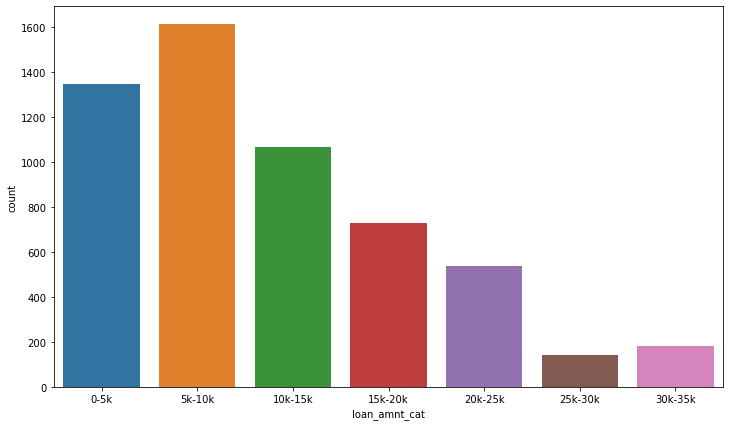

In [52]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'loan_amnt_cat', data = df[df['loan_status'] == 'Charged Off'])

<b><font color = "blue">*People who took loan in range of 5k-10k are mostly in defaulters*</font></b>

<b><font color = "red">*Observation 2*</font></b>

<AxesSubplot:xlabel='funded_amnt_inv_cat', ylabel='count'>

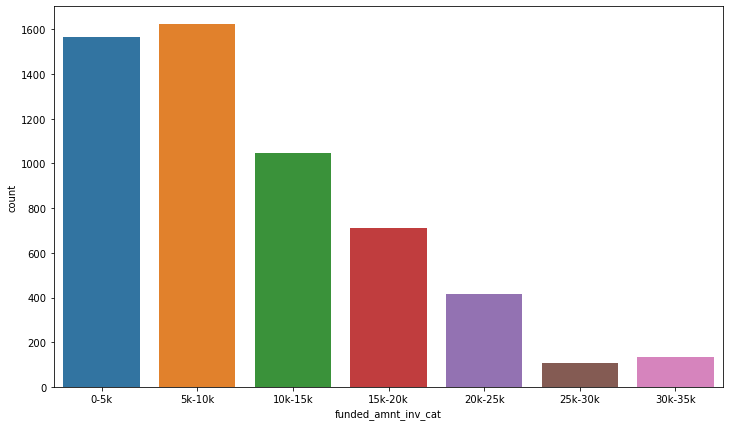

In [53]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'funded_amnt_inv_cat', data = df[df['loan_status'] == 'Charged Off'])

<b><font color = "blue">*Funded amount by investors in 5k-10k range highest in defaulters*</font></b>

<b><font color = "red">*Observation 3*</font></b>

<AxesSubplot:xlabel='int_rate_cat', ylabel='count'>

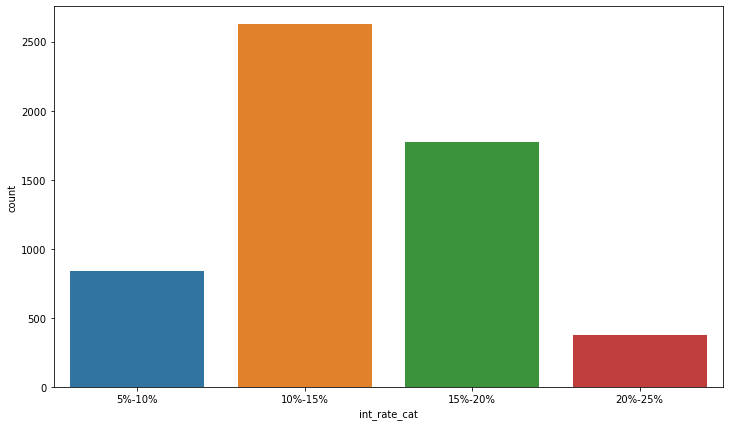

In [54]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'int_rate_cat', data = df[df['loan_status'] == 'Charged Off'])

<b><font color = "blue">*People who took loan with interest rate of 10%-15% are mostly in defaulters*</font></b>

<b><font color = "red">*Observation 4*</font></b>

<AxesSubplot:xlabel='open_acc_cat', ylabel='count'>

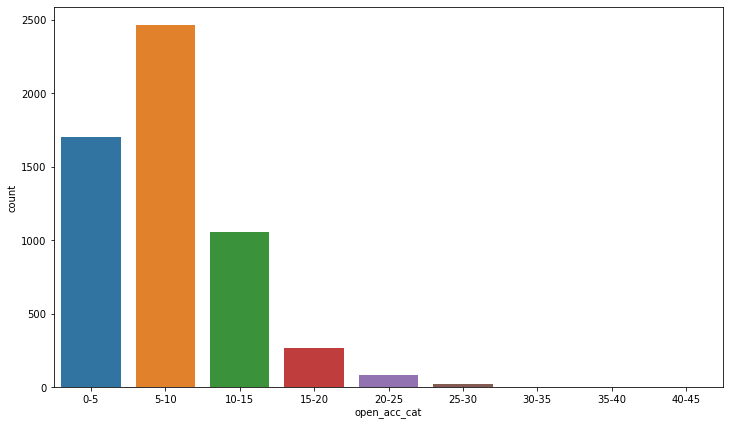

In [55]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'open_acc_cat', data = df[df['loan_status'] == 'Charged Off'])

<b><font color = "blue">*Default rate high in 5-10 range*</font></b>

<b><font color = "red">*Observation 5*</font></b>

<AxesSubplot:xlabel='revol_util_cat', ylabel='count'>

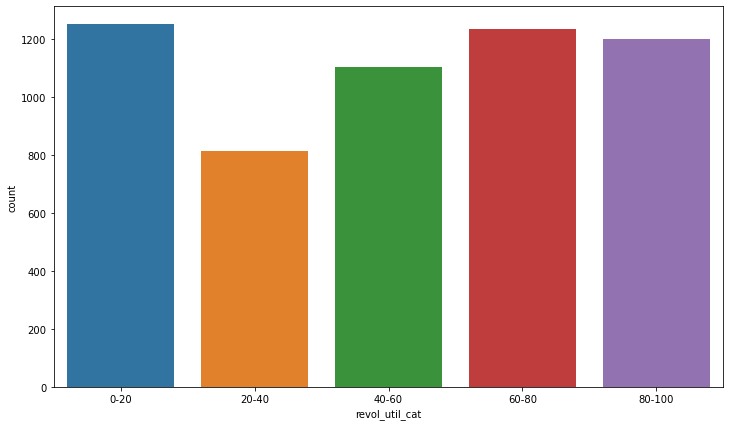

In [56]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'revol_util_cat', data = df[df['loan_status'] == 'Charged Off'])

<b><font color = "blue">*Not much variation found here, revolving line utilization is almost same except the range of 20-40*</font></b>

<b><font color = "red">*Observation 6*</font></b>

<AxesSubplot:xlabel='total_acc_cat', ylabel='count'>

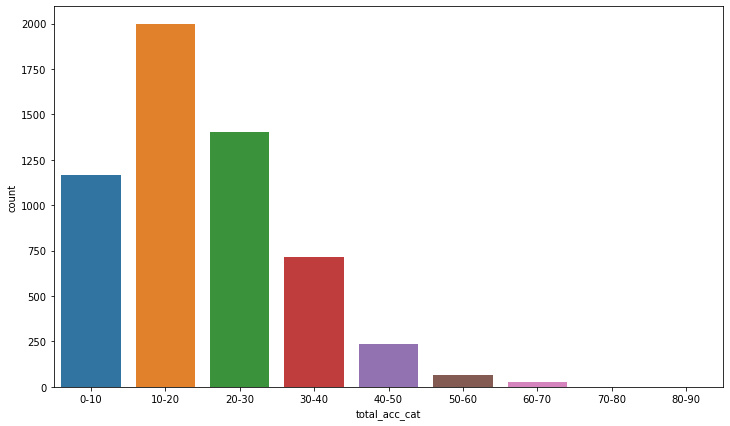

In [57]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'total_acc_cat', data = df[df['loan_status'] == 'Charged Off'])

<b><font color = "blue">*Defaulters are highest in credit line range of 10-20*</font></b>

<b><font color = "red">*Observation 7*</font></b>

In [58]:
#defining function to make a discrete group of annual income column
def annual_income(income):
    if income <= 50000:
        return 'low'
    elif income > 50000 and income <=100000:
        return 'medium'
    elif income > 100000 and income <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda income: annual_income(income))

<AxesSubplot:xlabel='annual_inc', ylabel='count'>

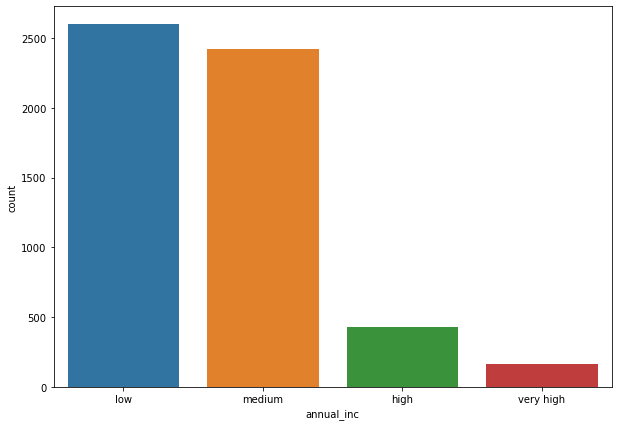

In [59]:
plt.figure(figsize=[10,7])
sns.countplot(x = 'annual_inc', data = df[df['loan_status'] == 'Charged Off'])

<b><font color = "blue">*People with annual income range of 0-50k are mostly in defaulters*</font></b>

<b><font color = "red">*Observation 8*</font></b>

<AxesSubplot:xlabel='installment_cat', ylabel='count'>

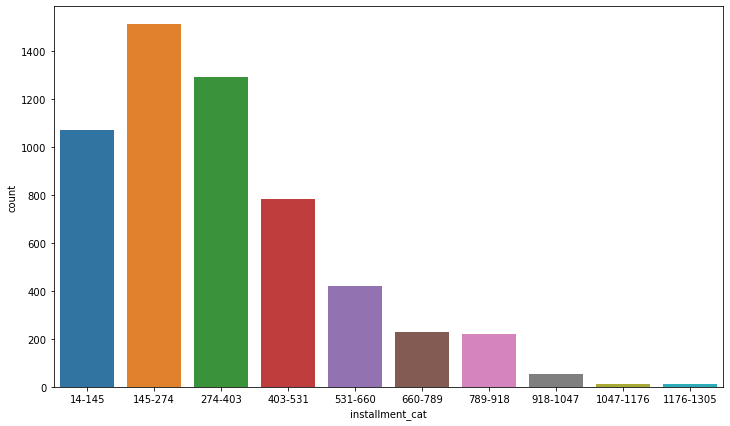

In [60]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'installment_cat', data = df[df['loan_status'] == 'Charged Off'])

<b><font color = "blue">*Most defaulters are found in the installment range of 145-274*</font></b>

<b><font color = "red">*Observation 9*</font></b>

<AxesSubplot:xlabel='dti_cat', ylabel='count'>

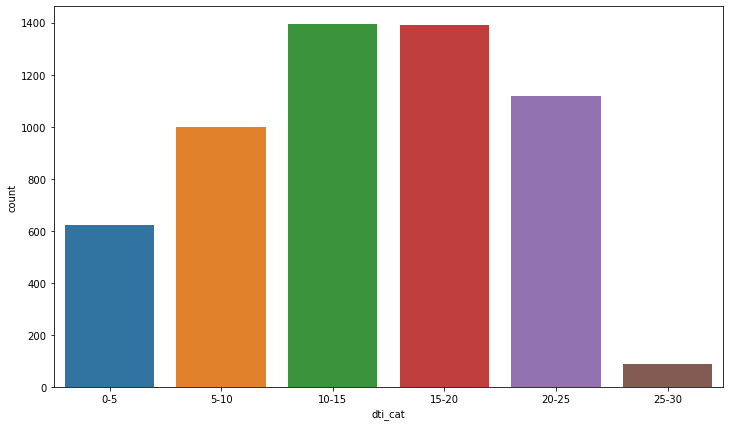

In [61]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'dti_cat', data = df[df['loan_status'] == 'Charged Off'])

<b><font color = "blue">*When debt to income ratio is between 10-20, default rate is highest*</font></b>

## BIVARIATE ANALYSIS

<b><font color = "red">*Observation 1*</font></b>

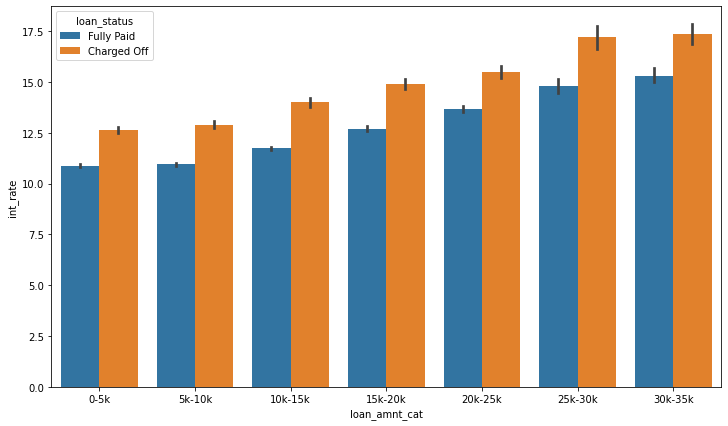

In [62]:
plt.figure(figsize=(12,7))
sns.barplot(data =df,x='loan_amnt_cat', y='int_rate', hue ='loan_status')
plt.show()

<b><font color = "blue">*Loan amount range 25k-35k having 15%-17% interest rate has high default rate*</font></b>

<b><font color = "red">*Observation 2*</font></b>

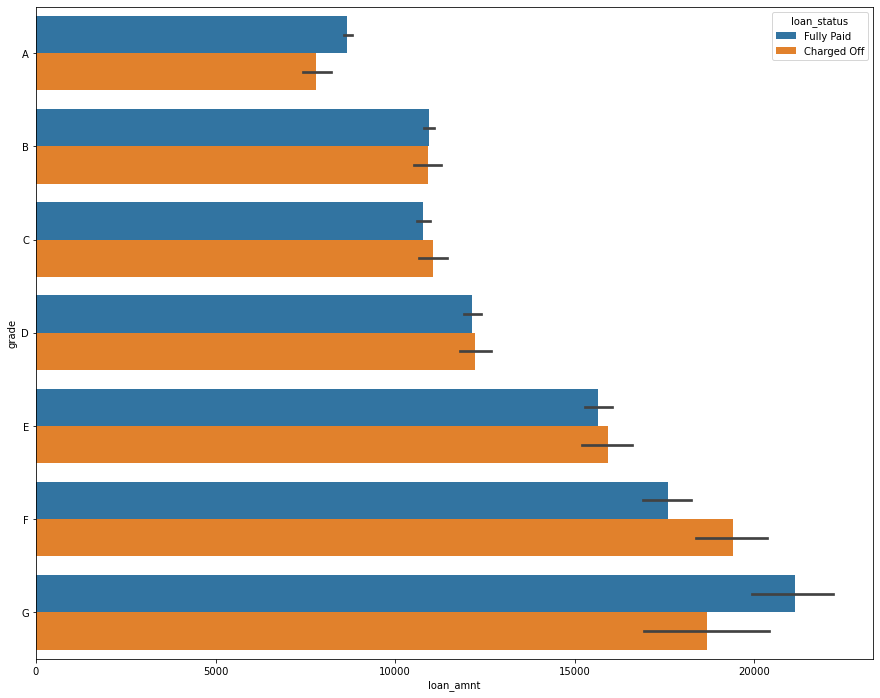

In [63]:
plt.figure(figsize=(15,12))
sns.barplot(data =df,x='loan_amnt', y='grade', hue ='loan_status',order=['A','B','C','D','E','F','G'])
plt.show()

<b><font color = "blue">*Grade F with loan amount 15k-20k are likely to be defaulters*</font></b>

<b><font color = "red">*Observation 3*</font></b>

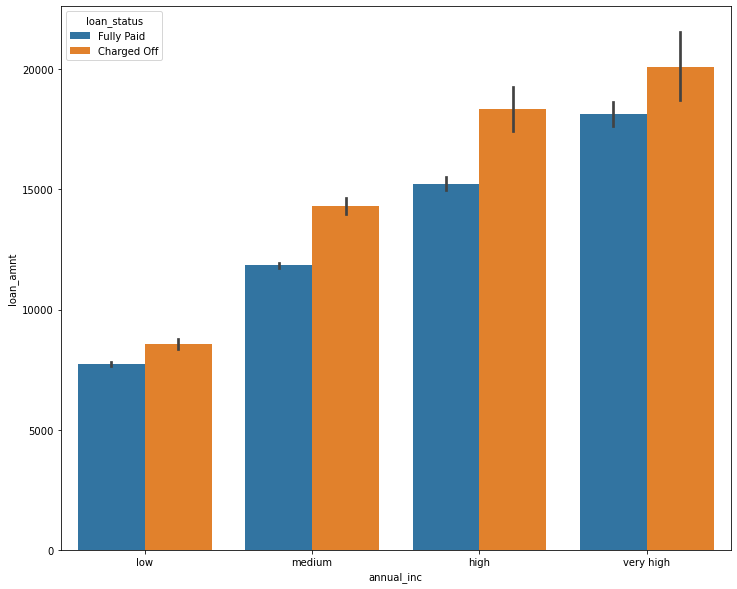

In [64]:
plt.figure(figsize=(12,10))
sns.barplot(data =df,x='annual_inc', y='loan_amnt', hue ='loan_status')
plt.show()

<b><font color = "blue">*Very High income group people with salary above 150k having loan amount in range 15k-20k has highest chances of defaulting*</font></b>

<b><font color = "red">*Observation 4*</font></b>

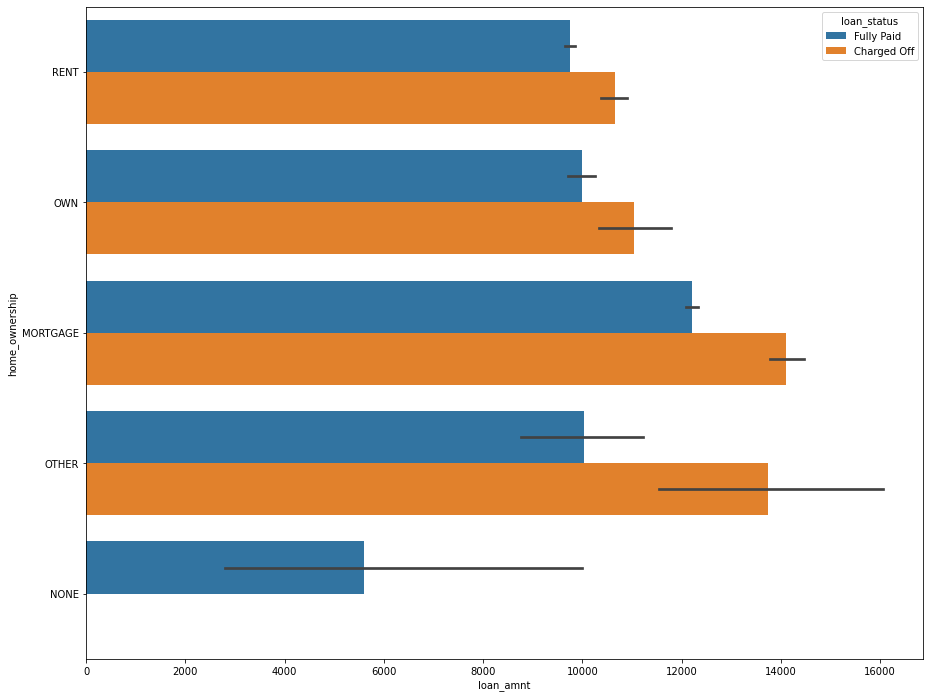

In [65]:
plt.figure(figsize=(15,12))
sns.barplot(data =df,x='loan_amnt', y='home_ownership', hue ='loan_status')
plt.show()

<b><font color = "blue">*High default rate in MORTGAGE category of home ownership having loan amount in range 12k-16k*</font></b>

<b><font color = "red">*Observation 5*</font></b>

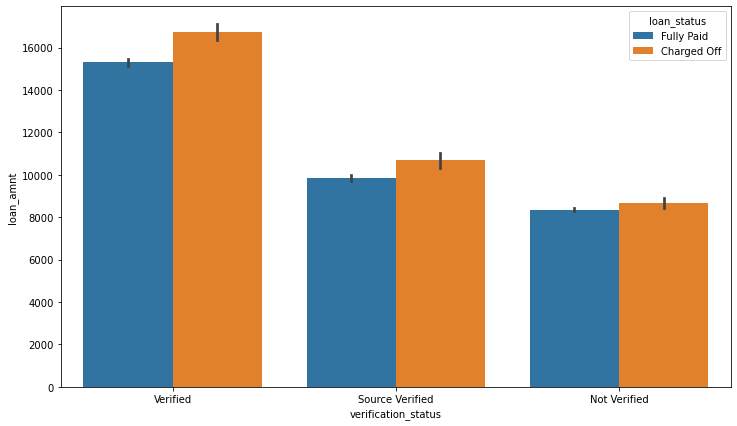

In [66]:
plt.figure(figsize=(12,7))
sns.barplot(data =df,x='verification_status', y='loan_amnt', hue ='loan_status')
plt.show()

<b><font color = "blue">*People with higher loan amount (above 16k) are defaulters and they get verified as well*</font></b>

<b><font color = "red">*Observation 6*</font></b>

<AxesSubplot:xlabel='loan_amnt', ylabel='purpose'>

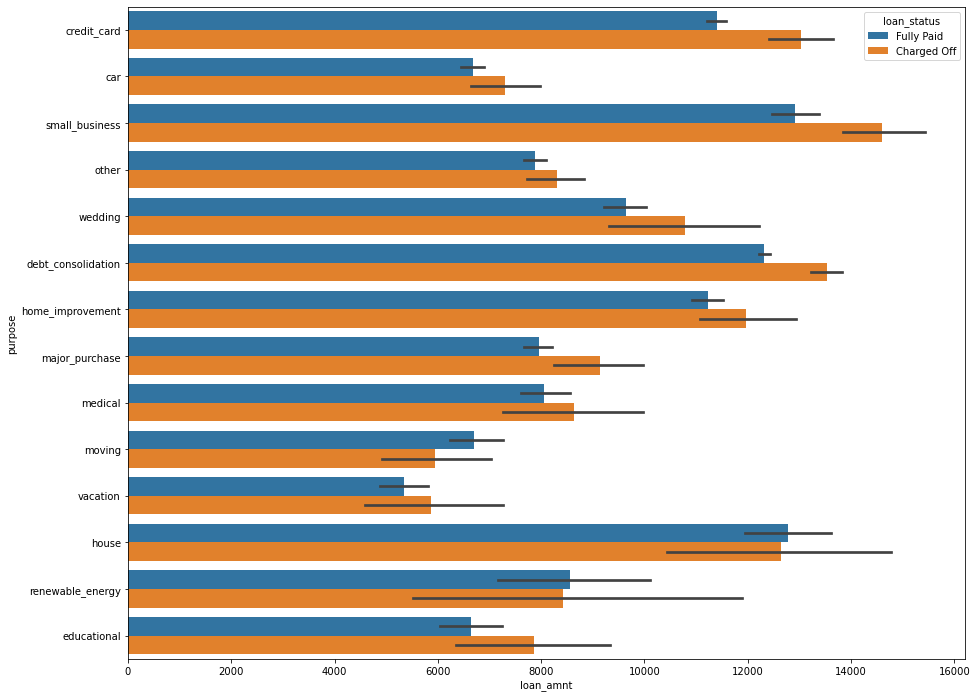

In [67]:
plt.figure(figsize=(15,12))
sns.barplot(data =df,y='purpose', x='loan_amnt', hue ='loan_status')

<b><font color = "blue">*Loans taken for Small businesses greater than 14k ends up being defaulters mostly*</font></b>

<b><font color = "red">*Observation 7*</font></b>

<AxesSubplot:xlabel='term', ylabel='annual_inc'>

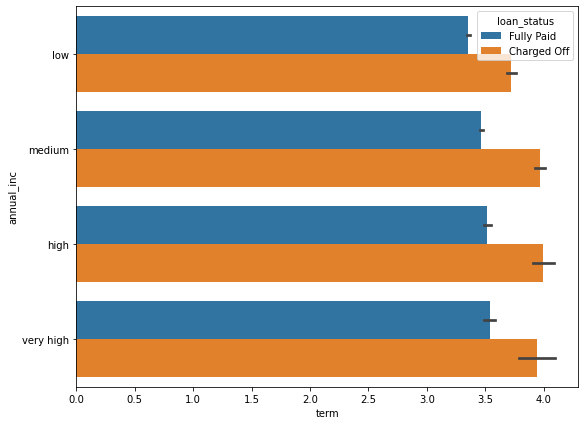

In [68]:
plt.figure(figsize=(9,7))
sns.barplot(data =df,x='term', y='annual_inc', hue ='loan_status')

<b><font color = "blue">*Medium to very high Income people with loan term of 3.5 - 4 years are likely to be defaulters*</font></b>

<b><font color = "red">*Observation 8*</font></b>

<AxesSubplot:xlabel='annual_inc', ylabel='emp_length'>

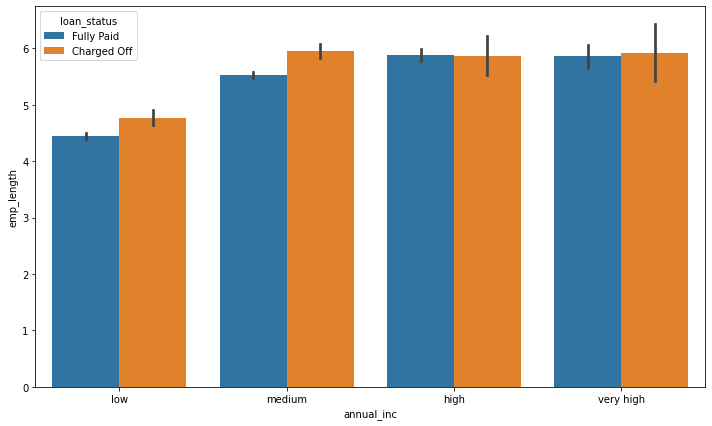

In [69]:
plt.figure(figsize=(12,7))
sns.barplot(data =df ,x='annual_inc', y='emp_length', hue ='loan_status')

<b><font color = "blue">*Medium to very high Income people with employment lenght of more than 5 years are likely to be defaulters*</font></b>

<b><font color = "red">*Observation 9*</font></b>

<AxesSubplot:xlabel='term', ylabel='int_rate'>

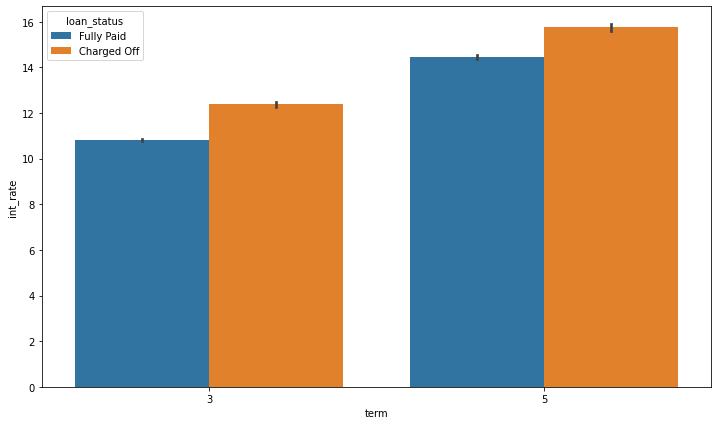

In [70]:
plt.figure(figsize=(12,7))
sns.barplot(data =df,x='term', y='int_rate', hue ='loan_status')

<b><font color = "blue">*People having Loan term of 5 years with interest rate of more than 15% are likely to be defaulters*</font></b>

## <U>SUMMARY

<b><font color = "red"><U>*UNIVARIATE ANALYSIS*</font></b>

*1.Approximately 14.5% people are defaulters*<BR>
*2.Defaulters are more in 3 year or 36 months term as compared to 5 year term*<BR>
*3.Most of the defaulters are of grade B*<BR>
*4.In Grade B, Sub Grade B5 are most in defaulters*<BR>
*5.People with employment length more than 10 years are topping the defaulters list*<BR>
*6.People living in rented house are most in defaulters*<BR>
*7.People whose verification is incomplete are mostly defaulters*<BR>
*8.Debt Consolidation loan seekers defaults the most*<BR>
*9.People from CA are most in defaulters*<BR>
*10.People with no public record are most in defaulters*<BR>
*11.People with zero public enquiries are highest in defaulters*<BR>
*12.People who took loan in 2011 tops the defaulters list*<BR>
*13.People who took loan in month of december are mostly in defaulters*<BR>

<b><font color = "red"><U>*SEGMENTED UNIVARIATE ANALYSIS*</font></b>

*1.People who took loan in range of 5k-10k are mostly in defaulters*<BR>
*2.Funded amount by investors in 5k-10k range highest in defaulters*<BR>
*3.People who took loan with interest rate of 10%-15% are mostly in defaulters*<BR>
*4.Default rate high in 5-10 opening credit range*<BR>
*5.Not much variation found here, revolving line utilization is almost same except the range of 20-40*<BR>
*6.Defaulters are highest in credit line range of 10-20*<BR>
*7.People with annual income range of 0-50k are mostly in defaulters*<BR>
*8.Most defaulters are found in the installment range of 145-274*<BR>
*9.When debt to income ratio is between 10-20, default rate is highest*<BR>

<b><font color = "red"><U>*BIVARIATE ANALYSIS*</font></b>

*1.Loan amount range 25k-35k having 15%-17% interest rate has high default rate*<BR>
*2.Grade F with loan amount 15k-20k are likely to be defaulters*<BR>
*3.Very High income group people with salary above 150k having loan amount in range 15k-20k has highest chances of defaulting*<BR>
*4.High default rate in MORTGAGE category of home ownership having loan amount in range 12k-16k*<BR>
*5.People with higher loan amount (above 16k) are defaulters and they get verified as well*<BR>
*6.Loans taken for Small businesses greater than 14k ends up being defaulters mostly*<BR>
*7.Medium to very high Income people with loan term of 3.5 - 4 years are likely to be defaulters*<BR>
*8.Medium to very high Income people with employment lenght of more than 5 years are likely to be defaulters*<BR>
*9.People having Loan term of 5 years with interest rate of more than 15% are likely to be defaulters*<BR>